<a href="https://colab.research.google.com/github/jasonstonemed/deep-learning-challenge/blob/main/Starter_Code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



#  Import and read the charity_data.csv.
import_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv").sample(n=25000, random_state=42)


In [2]:
# Make working copy of the dataframe that won't change when running new parameters
application_df = import_df.copy()

application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
7346,271598055,ASSOCIATION OF ST AUGUSTINE ALUMNI - ATLANTA INC,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,50087,1
30868,900109768,AMERICAN SOCIETY OF ADDICTION MEDICINE INC,T3,CompanySponsored,C1000,Preservation,Trust,1,0,N,5000,1
10670,352562499,TOPS CLUB INC,T3,CompanySponsored,C1200,Preservation,Association,1,0,N,5000,0
22408,611766879,TOPS CLUB INC,T3,CompanySponsored,C1200,Preservation,Association,1,0,N,5000,0
119,10874048,INTERNATIONAL RAFTING FEDERATION,T4,Independent,C1000,ProductDev,Trust,1,0,N,5000,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns= ['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'])


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
7346,T3,Independent,C1000,Preservation,Trust,100000-499999,50087,1
30868,T3,CompanySponsored,C1000,Preservation,Trust,0,5000,1
10670,T3,CompanySponsored,C1200,Preservation,Association,0,5000,0
22408,T3,CompanySponsored,C1200,Preservation,Association,0,5000,0
119,T4,Independent,C1000,ProductDev,Trust,0,5000,1
...,...,...,...,...,...,...,...,...
3675,T8,CompanySponsored,C1000,Preservation,Trust,0,5000,0
15450,T3,Independent,C2000,Preservation,Trust,0,5000,1
20608,T3,CompanySponsored,C1000,Preservation,Association,100000-499999,19585,0
17348,T3,CompanySponsored,C2100,Preservation,Trust,0,5000,0


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       25000
NAME                      14531
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               61
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    6400
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts


T3     19718
T4      1122
T6       896
T5       866
T19      760
T8       531
T7       515
T10      389
T9       113
T13       47
T12       19
T2        15
T25        3
T14        2
T29        2
T15        1
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       19718
T4        1122
T6         896
T5         866
T19        760
Other      592
T8         531
T7         515
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts


C1000    12671
C2000     4404
C1200     3512
C3000     1398
C2100     1357
         ...  
C8210        1
C1900        1
C2190        1
C2600        1
C1245        1
Name: CLASSIFICATION, Length: 61, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]



C1000    12671
C2000     4404
C1200     3512
C3000     1398
C2100     1357
C7000      569
C1700      200
C4000      133
C1270       92
C5000       87
C2700       82
C2800       71
C7100       57
C1300       44
C1280       33
C1230       29
C1400       26
C7200       25
C2300       23
C1240       21
C8000       16
C7120       15
C1500       14
C6000       13
C1250       10
C1235        9
C8200        9
C1237        8
C1800        8
C1238        8
C1278        5
C1257        5
C4100        5
C2400        4
C7210        3
C1260        3
C1256        2
C1246        2
C1234        2
C1600        2
C0           2
C1720        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    12671
C2000     4404
C1200     3512
Other     1658
C3000     1398
C2100     1357
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df




,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_14TH ARMORED DIVISION,NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
7346,271598055,1,50087,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
30868,900109768,1,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10670,352562499,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22408,611766879,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119,10874048,1,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,237214594,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15450,462659357,1,5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
20608,521242195,1,19585,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
17348,470985271,1,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(columns=['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
X_test, X_train, y_test, y_train = train_test_split(X,y, random_state=78)


In [12]:
# check y array
y[:5]

array([1, 1, 0, 0, 1])

In [13]:
# Check X array
X[:5]

array([[271598055,         1,     50087, ...,         0,         1,
                0],
       [900109768,         1,      5000, ...,         0,         1,
                0],
       [352562499,         1,      5000, ...,         0,         1,
                0],
       [611766879,         1,      5000, ...,         0,         1,
                0],
       [ 10874048,         1,      5000, ...,         0,         1,
                0]])

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer- input layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=14574))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))

# THird hidden layer
# nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 72875     
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 72,911
Trainable params: 72,911
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
196/196 [==============================] - 2s 7ms/step - loss: 0.6752 - accuracy: 0.4973
Epoch 2/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5646 - accuracy: 0.7170
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 0.4117 - accuracy: 0.8717
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 0.2796 - accuracy: 0.9294
Epoch 5/100
196/196 [==============================] - 1s 7ms/step - loss: 0.2052 - accuracy: 0.9402
Epoch 6/100
196/196 [==============================] - 2s 10ms/step - loss: 0.1746 - accuracy: 0.9413
Epoch 7/100
196/196 [==============================] - 2s 8ms/step - loss: 0.1638 - accuracy: 0.9414
Epoch 8/100
196/196 [==============================] - 1s 7ms/step - loss: 0.1586 - accuracy: 0.9421
Epoch 9/100
196/196 [==============================] - 1s 6ms/step - loss: 0.1554 - accuracy: 0.9434
Epoch 10/100
196/196 [==============================] - 1s 7ms/step - loss: 0.1539 - accur

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

586/586 - 2s - loss: 0.8067 - accuracy: 0.7399 - 2s/epoch - 3ms/step
Loss: 0.8066650032997131, Accuracy: 0.7398933172225952


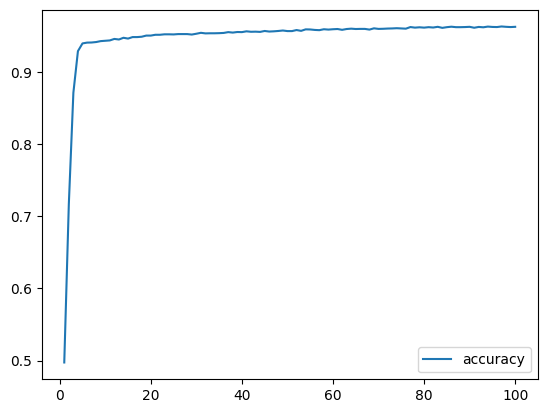

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")
